In [0]:
#import torch; torch.tensor([10.]*10000000000)

In [1]:
!wget -O images.zip --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6" && rm -rf /tmp/cookies.txt

!wget -O train.csv --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F" && rm -rf /tmp/cookies.txt

!unzip -qq -n images.zip

--2020-04-19 01:07:06--  https://docs.google.com/uc?export=download&confirm=E9ih&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6
Resolving docs.google.com (docs.google.com)... 74.125.31.101, 74.125.31.138, 74.125.31.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-6g-docs.googleusercontent.com/docs/securesc/vdcq5spr5fstn020ou1i3sqpk8lhbrjc/csc9poln3oeseb2e31bnnbdpksef9p09/1587258375000/12463928819926971683/07318118422609505554Z/1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6?e=download [following]
--2020-04-19 01:07:06--  https://doc-0g-6g-docs.googleusercontent.com/docs/securesc/vdcq5spr5fstn020ou1i3sqpk8lhbrjc/csc9poln3oeseb2e31bnnbdpksef9p09/1587258375000/12463928819926971683/07318118422609505554Z/1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6?e=download
Resolving doc-0g-6g-docs.googleusercontent.com (doc-0g-6g-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to

In [0]:
import pandas as pd

In [0]:
import PIL 

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [0]:
x = pd.read_csv('sample_sub_v2.csv')

In [0]:
len(x)

509

In [0]:
x = x.drop(['Unnamed: 0'], axis =1)

In [0]:
x = x.drop(['target'], axis =1)

In [0]:
x.head()

,image
0,aadawlxbmapqrblgxyzarhjasgiobu.png
1,abpxvdfyhaaohzcrngcucmhffwizxs.jpg
2,aclkjfvackiieiznzfcwienplielrj.jpg
3,aelkivmayxgsdjosiibfgmkvfrjvjk.jpg
4,aelzzshpfxerelefnkatpczktuxjln.jpg


In [0]:
x.to_csv('sample_submission_test')

In [0]:
x.head()

0    aadawlxbmapqrblgxyzarhjasgiobu.png
1    abpxvdfyhaaohzcrngcucmhffwizxs.jpg
2    aclkjfvackiieiznzfcwienplielrj.jpg
3    aelkivmayxgsdjosiibfgmkvfrjvjk.jpg
4    aelzzshpfxerelefnkatpczktuxjln.jpg
Name: image, dtype: object

In [0]:
path = Path('/content/images')

In [4]:
path.ls()

NameError: ignored

In [0]:
x = pd.read_csv('train.csv')

In [0]:
image = PIL.Image.open("/content/images/aadawlxbmapqrblgxyzarhjasgiobu.png")

width, height = image.size

In [0]:
width, height

(333, 499)

In [0]:
size = src_size // 2

TypeError: ignored

In [0]:
test_data = ImageList.from_csv('/content/','sample_sub_v2.csv', folder = 'images')

In [0]:
test_data

ImageList (509 items)
Image (3, 499, 333),Image (3, 236, 417),Image (3, 900, 1200),Image (3, 168, 299),Image (3, 750, 750)
Path: /content

In [0]:
src = (ImageList.from_csv('/content/', 'train.csv', folder = 'images')
       .split_by_rand_pct(0.1)
       .label_from_df(cols = 'target'))

In [0]:
data_small = (src.transform(get_transforms(),size = (161,249))
        .databunch(bs= 12)
        .normalize(imagenet_stats))

In [0]:
data_small.add_test(test_data)

In [0]:
data_small

ImageDataBunch;

Train: LabelList (1178 items)
x: ImageList
Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249)
y: CategoryList
0,1,0,1,0
Path: /content;

Valid: LabelList (130 items)
x: ImageList
Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249)
y: CategoryList
0,0,0,0,0
Path: /content;

Test: LabelList (509 items)
x: ImageList
Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249)
y: EmptyLabelList
,,,,
Path: /content

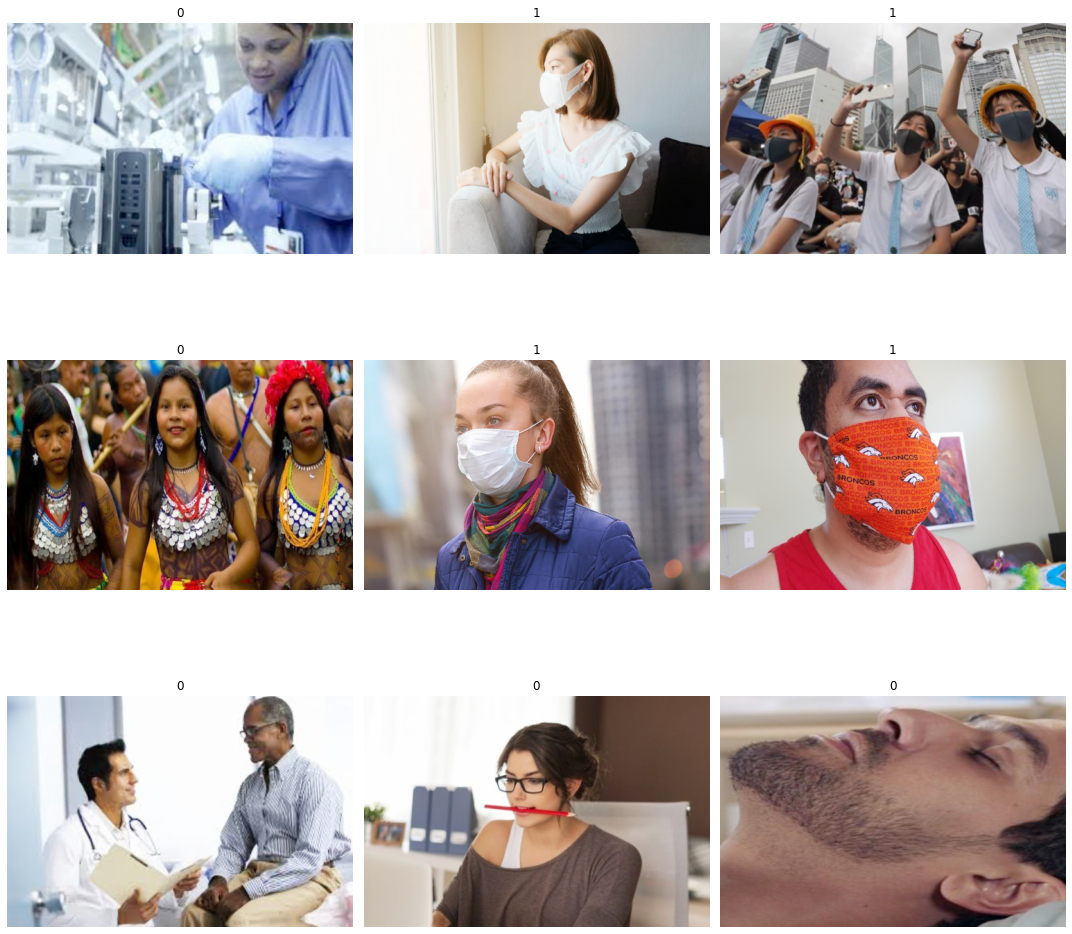

In [0]:
data_big.show_batch(rows=3, figsize=(15, 15))

In [0]:
!pip install pretrainedmodels

In [0]:
from torchvision.models import *
import pretrainedmodels

from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta

from utils import *
import sys

In [11]:
!pip install pytorchcv

     |████████████████████████████████| 440kB 2.8MB/s 


In [0]:
from pytorchcv.model_provider import get_model as ptcv_get_model
from torchvision.models import *

from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
from fastai.layers import Flatten

from utils import *
import sys

In [0]:
m = ptcv_get_model("efficientnet_b8c", pretrained=True)

In [10]:
m.features.__class__

torch.nn.modules.container.Sequential

In [0]:
output_size = m.output[1].in_features

In [12]:
output_size

2816

In [0]:
custom_head = nn.Linear(45056, 1)


In [32]:
arch_summary(lambda _: m.features)

(0) EffiInitBlock: 3   layers (total: 3)
(1) Sequential  : 30  layers (total: 33)
(2) Sequential  : 78  layers (total: 111)
(3) Sequential  : 78  layers (total: 189)
(4) Sequential  : 208 layers (total: 397)
(5) Sequential  : 182 layers (total: 579)
(6) ConvBlock   : 3   layers (total: 582)
(7) AdaptiveAvgPool2d: 1   layers (total: 583)


In [37]:
for i in range(7):
    print(f'---------({i})---------')
    arch_summary(lambda _: m.features[i])

---------(0)---------
(0) ConvBlock   : 3   layers (total: 3)
---------(1)---------
(0) EffiDwsConvUnit: 10  layers (total: 10)
(1) EffiDwsConvUnit: 10  layers (total: 20)
(2) EffiDwsConvUnit: 10  layers (total: 30)
---------(2)---------
(0) EffiInvResUnit: 13  layers (total: 13)
(1) EffiInvResUnit: 13  layers (total: 26)
(2) EffiInvResUnit: 13  layers (total: 39)
(3) EffiInvResUnit: 13  layers (total: 52)
(4) EffiInvResUnit: 13  layers (total: 65)
(5) EffiInvResUnit: 13  layers (total: 78)
---------(3)---------
(0) EffiInvResUnit: 13  layers (total: 13)
(1) EffiInvResUnit: 13  layers (total: 26)
(2) EffiInvResUnit: 13  layers (total: 39)
(3) EffiInvResUnit: 13  layers (total: 52)
(4) EffiInvResUnit: 13  layers (total: 65)
(5) EffiInvResUnit: 13  layers (total: 78)
---------(4)---------
(0) EffiInvResUnit: 13  layers (total: 13)
(1) EffiInvResUnit: 13  layers (total: 26)
(2) EffiInvResUnit: 13  layers (total: 39)
(3) EffiInvResUnit: 13  layers (total: 52)
(4) EffiInvResUnit: 13  layers

In [0]:
def efficientnet_b8c(pretrained=True):
    return ptcv_get_model("efficientnet_b8c", pretrained=True).features

In [0]:
learn = cnn_learner(data_small, efficientnet_b8c, pretrained=True, loss_func = loss, opt_func = Opt_DBZ,
                    cut=noop, split_on=lambda m: (m[0][4], m[1]), custom_head=nn.Sequential(Flatten(), nn.Linear(output_size, 1)))

In [0]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (1178 items)
x: ImageList
Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249)
y: CategoryList
0,1,0,1,0
Path: /content;

Valid: LabelList (130 items)
x: ImageList
Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249)
y: CategoryList
0,0,0,0,0
Path: /content;

Test: LabelList (509 items)
x: ImageList
Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249),Image (3, 161, 249)
y: EmptyLabelList
,,,,
Path: /content, model=Sequential(
  (0): Sequential(
    (init_block): EffiInitBlock(
      (conv): ConvBlock(
        (conv): Conv2d(3, 72, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(72, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (activ): Swish()
      )
    )
    (stage1): Sequential(
      (unit1): EffiDwsConvUnit(
        (dw_conv): ConvBl

In [0]:
len(learn.layer_groups)

3

In [0]:
learn.to_fp16();

In [0]:
[k for k,v in sys.modules['torchvision.models'].__dict__.items() if callable(v)]

['alexnet',
 'AlexNet',
 'ResNet',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'resnext50_32x4d',
 'resnext101_32x8d',
 'wide_resnet50_2',
 'wide_resnet101_2',
 'VGG',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19_bn',
 'vgg19',
 'SqueezeNet',
 'squeezenet1_0',
 'squeezenet1_1',
 'Inception3',
 'inception_v3',
 'InceptionOutputs',
 '_InceptionOutputs',
 'DenseNet',
 'densenet121',
 'densenet169',
 'densenet201',
 'densenet161',
 'googlenet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 '_GoogLeNetOutputs',
 'MobileNetV2',
 'mobilenet_v2',
 'MNASNet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'ShuffleNetV2',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0']

In [0]:
!pip install efficientnet_pytorch

In [0]:
from efficientnet_pytorch import EfficientNet

In [0]:
m = EfficientNet.from_pretrained('efficientnet-b7')

Loaded pretrained weights for efficientnet-b7


In [0]:
arch_summary(lambda _: m)

(0) Conv2dStaticSamePadding: 2   layers (total: 2)
(1) BatchNorm2d : 1   layers (total: 3)
(2) ModuleList  : 868 layers (total: 871)
(3) Conv2dStaticSamePadding: 2   layers (total: 873)
(4) BatchNorm2d : 1   layers (total: 874)
(5) AdaptiveAvgPool2d: 1   layers (total: 875)
(6) Dropout     : 1   layers (total: 876)
(7) Linear      : 1   layers (total: 877)
(8) MemoryEfficientSwish: 1   layers (total: 878)


In [0]:
arch_summary(lambda _: list(m.children())[2])

(0) MBConvBlock : 13  layers (total: 13)
(1) MBConvBlock : 13  layers (total: 26)
(2) MBConvBlock : 13  layers (total: 39)
(3) MBConvBlock : 13  layers (total: 52)
(4) MBConvBlock : 16  layers (total: 68)
(5) MBConvBlock : 16  layers (total: 84)
(6) MBConvBlock : 16  layers (total: 100)
(7) MBConvBlock : 16  layers (total: 116)
(8) MBConvBlock : 16  layers (total: 132)
(9) MBConvBlock : 16  layers (total: 148)
(10) MBConvBlock : 16  layers (total: 164)
(11) MBConvBlock : 16  layers (total: 180)
(12) MBConvBlock : 16  layers (total: 196)
(13) MBConvBlock : 16  layers (total: 212)
(14) MBConvBlock : 16  layers (total: 228)
(15) MBConvBlock : 16  layers (total: 244)
(16) MBConvBlock : 16  layers (total: 260)
(17) MBConvBlock : 16  layers (total: 276)
(18) MBConvBlock : 16  layers (total: 292)
(19) MBConvBlock : 16  layers (total: 308)
(20) MBConvBlock : 16  layers (total: 324)
(21) MBConvBlock : 16  layers (total: 340)
(22) MBConvBlock : 16  layers (total: 356)
(23) MBConvBlock : 16  laye

In [0]:
def efficient_net_b7(pretrained=True):
    model = EfficientNet.from_pretrained('efficientnet-b7')
    return nn.Sequential(model)

In [0]:
model_meta[efficient_net_b7] =  { 'cut': noop, 
                               'split': lambda m: (list(m[0][0].children())[2][7], m[1]) }

In [0]:
custom_head = nn.Linear(1000, 1)


In [0]:
loss = BCEWithLogitsFlat()

In [0]:
learn_big = cnn_learner(data_big, efficient_net_b7, loss_func = loss, custom_head = custom_head, metrics=[error_rate, accuracy]).to_fp16()

Loaded pretrained weights for efficientnet-b7


In [0]:
learn_big.load('/content/bestpostfreezebigfinalBCE0.0428474880');

In [0]:
learn.loss_func

FlattenedLoss of BCEWithLogitsLoss()

In [0]:
get_groups(nn.Sequential(*list(learn.model[0][0].children())[:2], 
                         *list(learn.model[0][0].children())[2],
                         *list(learn.model[0][0].children())[3:],
                         learn.model[1]), 
           learn.layer_groups)


Group 1: ['Conv2dStaticSamePadding', 'BatchNorm2d', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock']
Group 2: ['MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'MBConvBlock', 'Conv2dStaticSamePadding', 'BatchNorm2d', 'AdaptiveAvgPool2d', 'Dropout', 'Linear', 'MemoryEfficientSwish']
Group

In [0]:
from fastai.callbacks import *

In [0]:
from over9000 import *

In [0]:
from lookahead import Lookahead

In [0]:
from ralamb import Ralamb

In [0]:
def DBZ(params, alpha=0.5, k=6, *args, **kwargs):
    ralamb = Ralamb(params, *args, **kwargs)
    return Lookahead(ralamb, alpha, k)

In [0]:
Opt_DBZ = partial(DBZ)

In [22]:
learn_big.opt_func = Opt_DBZ

NameError: ignored

In [0]:
def flattenAnneal(learn:Learner, lr:float, n_epochs:int, start_pct:float, callbacks):
  n = len(learn.data.train_dl)
  anneal_start = int(n*n_epochs*start_pct)
  anneal_end = int(n*n_epochs) - anneal_start
  phases = [TrainingPhase(anneal_start).schedule_hp('lr', lr),
           TrainingPhase(anneal_end).schedule_hp('lr', lr, anneal=annealing_cos)]
  sched = GeneralScheduler(learn, phases)
  learn.callbacks.append(sched)
  learn.fit(n_epochs, callbacks = callbacks)

In [0]:
learn.callbacks.append(ShowGraph(learn))

In [0]:
learn.data = data_small

In [0]:
learn.freeze_to(-1)

In [31]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [72, 81, 124]        1,944      False     
______________________________________________________________________
BatchNorm2d          [72, 81, 124]        144        True      
______________________________________________________________________
Swish                [72, 81, 124]        0          False     
______________________________________________________________________
Conv2d               [72, 81, 124]        648        False     
______________________________________________________________________
BatchNorm2d          [72, 81, 124]        144        True      
______________________________________________________________________
Swish                [72, 81, 124]        0          False     
______________________________________________________________________
AdaptiveAvgPool2d    [72, 1, 1]           0          False     
___________________________________________________

In [60]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 9.12E-02


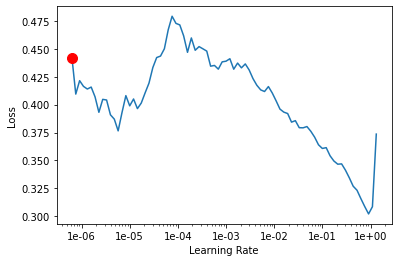

In [61]:
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,time
0,0.145735,0.119416,00:57
1,0.306473,0.402163,00:55
2,0.353072,0.145834,00:55
3,0.547926,0.335480,00:55
4,0.334012,0.222183,00:56
5,0.325043,0.277516,00:55
6,0.225841,0.408876,00:56
7,0.271787,0.249987,00:56
8,0.218512,0.133129,00:56
9,0.149765,0.137692,00:57


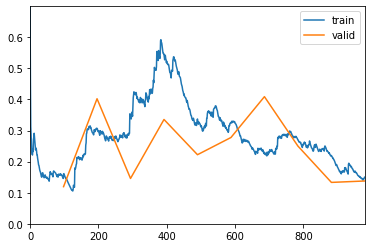

Better model found at epoch 0 with valid_loss value: 0.1194155216217041.


In [62]:
flattenAnneal(learn, 2e-1, 10, 0.7, callbacks=[SaveModelCallback(learn,
monitor='valid_loss',
mode='min',
name='bestprefreezesmallv2b8c')])

In [0]:
learn.load('bestprefreezesmallv2b8c');

In [0]:
learn.freeze_to(-2)

In [72]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-06
Min loss divided by 10: 3.02E-06


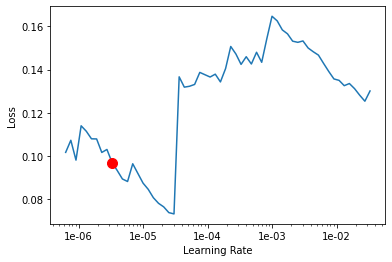

In [73]:
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,time
0,0.148730,0.104224,01:25
1,0.162790,0.113130,01:25
2,0.149620,0.109183,01:25
3,0.154722,0.110510,01:25
4,0.110773,0.102820,01:25
5,0.096401,0.106714,01:25
6,0.098478,0.102939,01:25


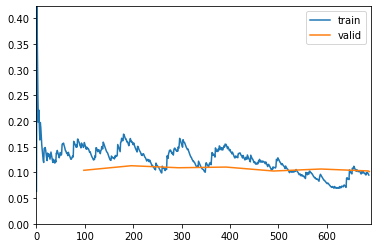

Better model found at epoch 0 with valid_loss value: 0.10422409325838089.
Better model found at epoch 4 with valid_loss value: 0.1028197631239891.
Better model found at epoch 7 with valid_loss value: 0.10176344215869904.


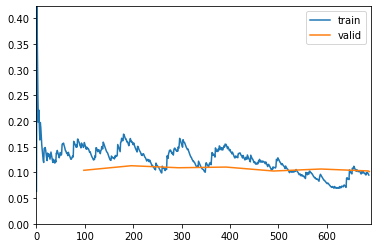

In [74]:
flattenAnneal(learn, 4e-6, 10, 0.7, callbacks=[SaveModelCallback(learn,
monitor='valid_loss',
mode='min',
name='bestmidfreezesmallv2b8c')])

In [0]:
learn.load('bestmidfreezesmallv2b8c');

In [0]:
learn.unfreeze()

In [97]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.29E-06
Min loss divided by 10: 6.31E-08


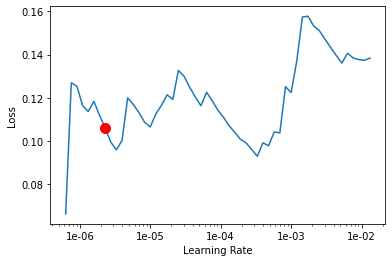

In [98]:
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,time
0,0.080632,0.109710,01:39
1,0.103675,0.104833,01:40
2,0.112657,0.100218,01:40
3,0.142679,0.102017,01:40
4,0.098655,0.108352,01:40
5,0.077870,0.102480,01:40
6,0.082065,0.108100,01:40
7,0.098382,0.107356,01:41
8,0.093459,0.108128,01:41
9,0.077791,0.106700,01:42


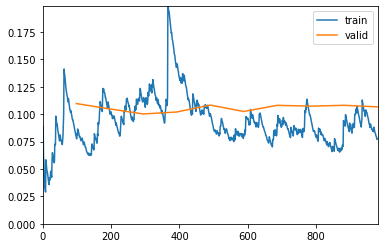

Better model found at epoch 0 with valid_loss value: 0.10971049219369888.
Better model found at epoch 1 with valid_loss value: 0.10483282804489136.
Better model found at epoch 2 with valid_loss value: 0.10021766275167465.


In [99]:
flattenAnneal(learn, 2e-7, 10, 0.7, callbacks=[SaveModelCallback(learn,
monitor='valid_loss',
mode='min',
name='bestpostfreezesmallv2b8c')])

In [0]:
learn.load('bestpostfreezesmallb8c');

In [0]:
learn.data = data_big

In [0]:
predictions = learn_big.get_preds(ds_type=DatasetType.Test)

In [0]:
x = pd.read_csv('sample_sub_v2.csv')

In [0]:
x['target'] = predictions[0].numpy()

In [0]:
x.head()

,image,target
0,aadawlxbmapqrblgxyzarhjasgiobu.png,0.992214
1,abpxvdfyhaaohzcrngcucmhffwizxs.jpg,0.000188
2,aclkjfvackiieiznzfcwienplielrj.jpg,0.999296
3,aelkivmayxgsdjosiibfgmkvfrjvjk.jpg,0.999972
4,aelzzshpfxerelefnkatpczktuxjln.jpg,0.001782


In [0]:
x.to_csv('submission1.csv', index=False)

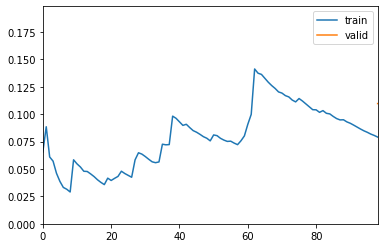

[0.10021766]

In [102]:
learn.validate(data_small.valid_dl)

In [0]:
len(x)

509

In [0]:
import shutil

In [101]:
shutil.move('/content/models/bestpostfreezesmallv2b8c.pth','/content/drive/My Drive/fastai-v3/bestpostfreezesmallv2b8c.pth')

'/content/drive/My Drive/fastai-v3/bestpostfreezesmallv2b8c.pth'

In [0]:
 predictions = learn_big.TTA(ds_type=DatasetType.Test)

In [0]:
x['target'] = predictions[0].numpy()

In [0]:
x.head()

,image,target
0,aadawlxbmapqrblgxyzarhjasgiobu.png,0.917805
1,abpxvdfyhaaohzcrngcucmhffwizxs.jpg,0.243049
2,aclkjfvackiieiznzfcwienplielrj.jpg,0.993792
3,aelkivmayxgsdjosiibfgmkvfrjvjk.jpg,0.985037
4,aelzzshpfxerelefnkatpczktuxjln.jpg,0.002168


In [0]:
x.to_csv('submission2.csv', index=False)